In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
#defining alpha, beta, d/dt
def alphan(V):
    return 0.01*(V+55)/(1-np.exp(-0.1*(V+55)))

def betan(V):
    return 0.125*np.exp(-0.0125*(V+65))

def Ik(gk,n,V,Ek):
    return gk*n**4*(V-Ek)

def dn(V,x):
    return alphan(V)*(1-x)-betan(V)*x

<ipython-input-41-d49956162928>:3: RuntimeWarning: invalid value encountered in true_divide
  return 0.01*(V+55)/(1-np.exp(-0.1*(V+55)))


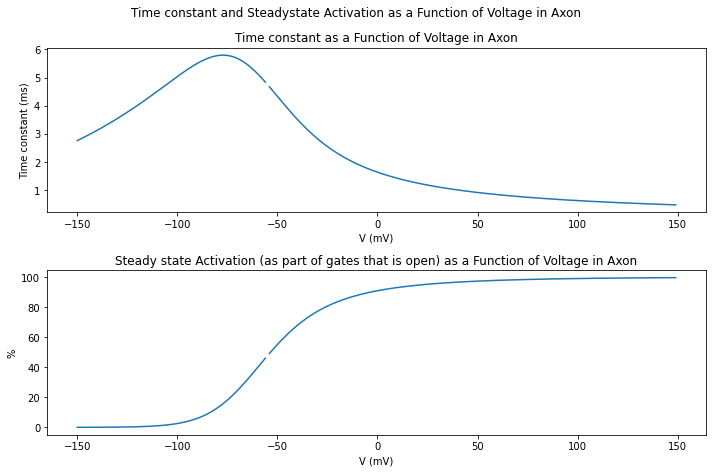

In [42]:
# calculating taun and ninf as a function of voltage in squid axon
V = np.arange(-150,150,1)
taun = 1/(alphan(V)+betan(V))
ninf = alphan(V)/(alphan(V)+betan(V))

fig, axs = plt.subplots(2,1, figsize = (10,6.66))
plt.suptitle("Time constant and Steadystate Activation as a Function of Voltage in Axon")
plt.setp(axs[:], xlabel='V (mV)')
axs[0].plot(V,taun)
axs[0].set_title("Time constant as a Function of Voltage in Axon")
axs[0].set_ylabel("Time constant (ms)")
axs[1].plot(V,ninf*100)
axs[1].set_title("Steady state Activation (as part of gates that is open) as a Function of Voltage in Axon")
axs[1].set_ylabel("%")
fig.tight_layout()

In [43]:
#general euler method of defining ODE
def euler(f_func, x_0, V, t):
  x = np.zeros(len(t))
  x[0] = x_0
  for i in range(0,len(t)-1):
      x[i+1]=x[i]+f_func(V[i],x[i])*dt
  return x

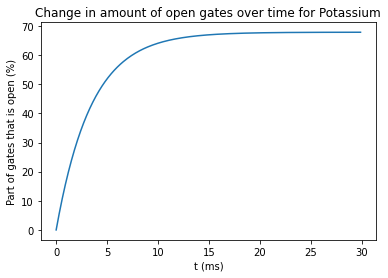

In [44]:
#calculating n (open gates) as a function of time with given voltage in axon = -40mV
n1_0 = 0
t_max = 30
dt = 0.1
t = np.arange(0,t_max,dt)
V1 = np.full(np.size(t),-40)
n1 = euler(dn, n1_0, V1, t)
plt.plot(t,n1*100)
plt.xlabel("t (ms)")
plt.ylabel('Part of gates that is open (%)')
plt.title('Change in amount of open gates over time for Potassium');
#to calculate difference to steady state
#ndiff = n - n[len(t)-1]

In [45]:
#defining function that is given in exercise
def Vfunc(Vc,dt):
    V = np.zeros(len(t))
    for i in np.arange(0,len(t)):
        if i*dt >= 2:
            V[i] = Vc
        else:
            V[i] = -65
    return V

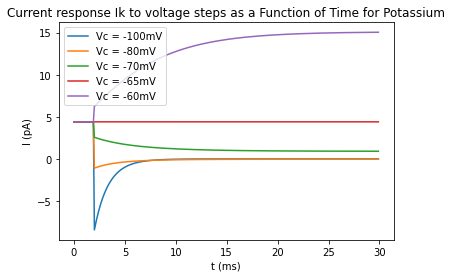

In [46]:
#Voltage clamp
t_max = 30
dt = 0.1
t = np.arange(0,t_max,dt)
n2 = np.zeros((5,len(t)))
I = np.zeros((5,len(t)))
Vc = np.array([-100,-80,-70,-65,-60])

for i in range(0,5,1):
    V2 = Vfunc(Vc[i],dt)
    n2[i,:] = euler(dn,0.3177,V2,t)
    I[i,:] = Ik(36*1e-9,n2[i,:],V2*1e-3,-77*1e-3)
    plt.plot(t,I[i,:]*1e12)
plt.legend(['Vc = -100mV','Vc = -80mV','Vc = -70mV','Vc = -65mV','Vc = -60mV'])
plt.xlabel('t (ms)')
plt.ylabel('I (pA)')
plt.title('Current response Ik to voltage steps as a Function of Time for Potassium');

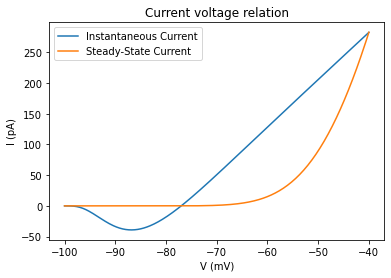

In [47]:
#Current voltage relation
V3 = np.linspace(-100,-40, num=300)
Iinst = Ik(36*1e-9,n1,V3*1e-3,-77*1e-3)
ninf = alphan(V3)/(alphan(V3)+betan(V3))
Istat = Ik(36*1e-9,ninf,V3*1e-3,-77*1e-3)
plt.plot(V3,Iinst*1e12)
plt.plot(V3,Istat*1e12)
plt.legend(['Instantaneous Current','Steady-State Current'])
plt.title('Current voltage relation')
plt.xlabel('V (mV)')
plt.ylabel('I (pA)');

## Exercise 2: Sodium ion Channel

In [48]:
#defining alpha, beta, d/dt
def Ina(gna,m,h,V,Ena):
    return gna*m**3*h*(V-Ena)

def alpham(V):
    return 0.1*(V+40)/(1-np.exp(-0.1*(V+40)))

def betam(V):
    return 4*np.exp(-0.0556*(V+65))

def alphah(V):
    return 0.07*np.exp(-0.05*(V+65))

def betah(V):
    return 1/(1+np.exp(-0.1*(V+35)))

def dm(V,x):
    return alpham(V)*(1-x)-betam(V)*x

def dh(V,x):
    return alphah(V)*(1-x)-betah(V)*x

<ipython-input-48-e14a820ee0f1>:6: RuntimeWarning: invalid value encountered in true_divide
  return 0.1*(V+40)/(1-np.exp(-0.1*(V+40)))


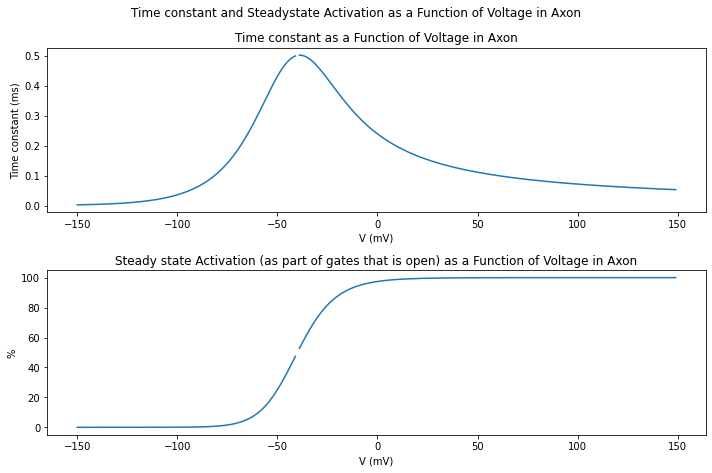

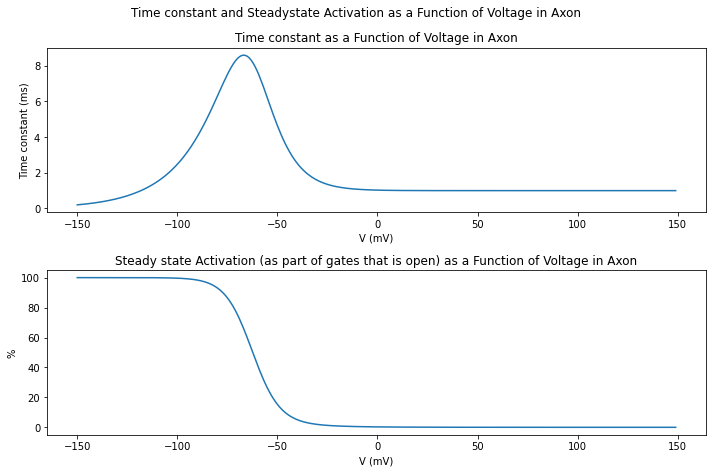

In [49]:
# calculating taum/h and m/hinf as a function of voltage in squid axon
V = np.arange(-150,150,1)
taum = 1/(alpham(V)+betam(V))
minf = alpham(V)/(alpham(V)+betam(V))

fig, axs = plt.subplots(2,1, figsize = (10,6.66))
plt.suptitle("Time constant and Steadystate Activation as a Function of Voltage in Axon")
plt.setp(axs[:], xlabel='V (mV)')
axs[0].plot(V,taum)
axs[0].set_title("Time constant as a Function of Voltage in Axon")
axs[0].set_ylabel("Time constant (ms)")
axs[1].plot(V,minf*100)
axs[1].set_title("Steady state Activation (as part of gates that is open) as a Function of Voltage in Axon")
axs[1].set_ylabel("%")
fig.tight_layout()

V = np.arange(-150,150,1)
tauh = 1/(alphah(V)+betah(V))
hinf = alphah(V)/(alphah(V)+betah(V))

fig, axs = plt.subplots(2,1, figsize = (10,6.66))
plt.suptitle("Time constant and Steadystate Activation as a Function of Voltage in Axon")
plt.setp(axs[:], xlabel='V (mV)')
axs[0].plot(V,tauh)
axs[0].set_title("Time constant as a Function of Voltage in Axon")
axs[0].set_ylabel("Time constant (ms)")
axs[1].plot(V,hinf*100)
axs[1].set_title("Steady state Activation (as part of gates that is open) as a Function of Voltage in Axon")
axs[1].set_ylabel("%")
fig.tight_layout();

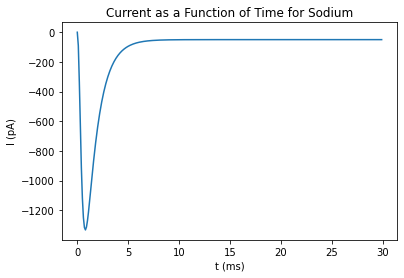

In [50]:
#calculating current at given voltage = -20mV and initial conditions for ODEs
m1_0 = 0.0529
h1_0 = 0.5961
t_max = 30
dt = 0.1
t = np.arange(0,t_max,dt)
V1 = np.full(np.size(t),-20)
m1 = euler(dm, m1_0, V1, t)
h1 = euler(dh, h1_0, V1, t)
Ina1 = Ina(120*1e-9,m1,h1,V1*1e-3,50*1e-3)
plt.plot(t,Ina1*1e12)
plt.xlabel('t (ms)')
plt.ylabel('I (pA)')
plt.title('Current as a Function of Time for Sodium');

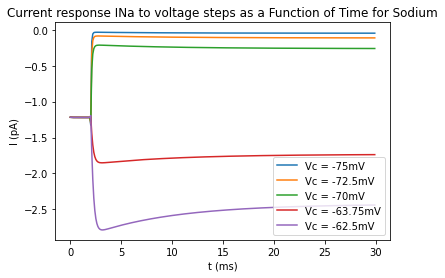

In [51]:
#Voltage clamp
t_max = 30
dt = 0.1
t = np.arange(0,t_max,dt)
m2 = np.zeros((5,len(t)))
h2 = np.zeros((5,len(t)))  
I2 = np.zeros((5,len(t)))
Vc = np.array([-75,-72.5,-70,-63.75,-62.5])

for i in range(0,5,1):
    V2 = Vfunc(Vc[i],dt)
    m2[i,:] = euler(dm,m1_0,V2,t)
    h2[i,:] = euler(dh,h1_0,V2,t)
    I2[i,:] = Ina(120*1e-9,m2[i,:],h2[i,:],V2*1e-3,50*1e-3)
    plt.plot(t,I2[i,:]*1e12)
plt.legend(['Vc = -75mV','Vc = -72.5mV','Vc = -70mV','Vc = -63.75mV','Vc = -62.5mV'])
plt.xlabel('t (ms)')
plt.ylabel('I (pA)')
plt.title('Current response INa to voltage steps as a Function of Time for Sodium');

<ipython-input-48-e14a820ee0f1>:6: RuntimeWarning: invalid value encountered in true_divide
  return 0.1*(V+40)/(1-np.exp(-0.1*(V+40)))


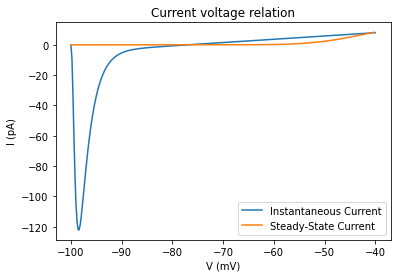

In [52]:
#Current voltage relation
V3 = np.linspace(-100,-40, num=300)
Iinst = Ina(36*1e-9,m1,h1,V3*1e-3,-77*1e-3)
minf = alpham(V3)/(alpham(V3)+betam(V3))
hinf = alphah(V3)/(alphah(V3)+betah(V3))
Istat = Ina(36*1e-9,minf,hinf,V3*1e-3,-77*1e-3)
plt.plot(V3,Iinst*1e12)
plt.plot(V3,Istat*1e12)
plt.legend(['Instantaneous Current','Steady-State Current'])
plt.title('Current voltage relation')
plt.xlabel('V (mV)')
plt.ylabel('I (pA)');